In [120]:
import csv
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale,robust_scale,minmax_scale,maxabs_scale
import datetime
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

# 데이터 준비

In [121]:
data='./training.csv'
train=pd.read_csv(data,header=0)
train=pd.DataFrame(data=train)

In [122]:
train.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [123]:
train.isnull().any()

RefId                                False
IsBadBuy                             False
PurchDate                            False
Auction                              False
VehYear                              False
VehicleAge                           False
Make                                 False
Model                                False
Trim                                  True
SubModel                              True
Color                                 True
Transmission                          True
WheelTypeID                           True
WheelType                             True
VehOdo                               False
Nationality                           True
Size                                  True
TopThreeAmericanName                  True
MMRAcquisitionAuctionAveragePrice     True
MMRAcquisitionAuctionCleanPrice       True
MMRAcquisitionRetailAveragePrice      True
MMRAcquisitonRetailCleanPrice         True
MMRCurrentAuctionAveragePrice         True
MMRCurrentA

refid,byrno 는 그 데이터에 대한 식별이므로 필요가 없으므로 삭제

model,trim,submodel은 너무나도 카테고리가 많아서 삭제

vnzip1,wheeltypeid는 중복되므로 삭제

primeunit, aucguart는 데이터가 너무없어서 쓸수가 없다고 판단하여 삭제


In [124]:
train=train.drop(["VehYear"],axis=1)
train=train.drop(["RefId"],axis=1)
train=train.drop(["Model"],axis=1)
train=train.drop(["Trim"],axis=1)
train=train.drop(["SubModel"],axis=1)
train=train.drop(["WheelTypeID"],axis=1)
train=train.drop(["PRIMEUNIT"],axis=1)
train=train.drop(["AUCGUART"],axis=1)
train=train.drop(["VNZIP1"],axis=1)
train=train.drop(["PurchDate"],axis=1)
train=train.drop(["BYRNO"],axis=1)

# 데이터 채우기와 nan 데이터 삭제

In [125]:
print np.where(train["Transmission"].isnull()==True)

(array([15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450]),)


In [126]:
train.loc[[15906, 24567, 24578, 70432, 70434, 70437, 70445, 70446, 70450],["Transmission"]]="AUTO"



In [127]:
train.dropna(subset=["Color"], inplace=True)
train.dropna(subset=["MMRAcquisitionAuctionAveragePrice"], inplace=True)
train.dropna(subset=["MMRCurrentAuctionAveragePrice"], inplace=True)
train.dropna(subset=["Size"], inplace=True)
train.loc[train["WheelType"].isnull(),"WheelType"]="Alloy"
train.loc[train['Transmission']=="Manual","Transmission"]="MANUAL"

In [128]:
train_x=train.ix[:,1:-1]
train_y=train.ix[:,0]

In [129]:
set(train.columns.values)

{'Auction',
 'Color',
 'IsBadBuy',
 'IsOnlineSale',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'Make',
 'Nationality',
 'Size',
 'TopThreeAmericanName',
 'Transmission',
 'VNST',
 'VehBCost',
 'VehOdo',
 'VehicleAge',
 'WarrantyCost',
 'WheelType'}

In [130]:
train

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,FL,7100.0,0,1113
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,FL,7600.0,0,1053
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,FL,4900.0,0,1389
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,FL,4100.0,0,630
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,FL,4000.0,0,1020
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,...,6706.0,8577.0,4709.0,5827.0,8149.0,9451.0,FL,5600.0,0,594
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,...,6240.0,8496.0,2980.0,4115.0,6230.0,8603.0,FL,4200.0,0,533
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,...,6667.0,7707.0,3713.0,4578.0,6942.0,8242.0,FL,4500.0,0,825
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,...,9687.0,10624.0,6417.0,7371.0,9637.0,10778.0,FL,5600.0,0,482
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,...,11734.0,13656.0,9167.0,10988.0,12580.0,14845.0,FL,7700.0,0,1633


In [131]:
train.describe()

,IsBadBuy,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,IsOnlineSale,WarrantyCost
count,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000,72659.000000
mean,0.123082,4.180129,71525.269684,6128.863444,7374.923547,8501.501603,9856.867546,6132.243039,7390.858889,8776.067631,10145.751208,6730.821095,0.025379,1277.075380
std,0.328533,1.710415,14567.921909,2462.449235,2723.808694,3156.157675,3386.027183,2434.547354,2686.232349,3090.543709,3310.099305,1767.905507,0.157274,599.233115
min,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,462.000000
25%,0.000000,3.000000,61874.500000,4273.000000,5409.000000,6288.000000,7501.000000,4275.000000,5415.000000,6537.000000,7784.000000,5435.000000,0.000000,837.000000
50%,0.000000,4.000000,73383.000000,6098.000000,7305.000000,8447.000000,9798.000000,6063.000000,7313.000000,8729.000000,10103.000000,6700.000000,0.000000,1169.000000
75%,0.000000,5.000000,82452.000000,7761.000000,9024.000000,10657.000000,12092.000000,7736.000000,9013.000000,10911.000000,12309.000000,7900.000000,0.000000,1623.000000
max,1.000000,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,45469.000000,1.000000,7498.000000


In [132]:
numerical_features = train.select_dtypes(include=["float64","int64","bool"]).columns.values
categorical_features = train.select_dtypes(include=["object"]).columns.values

In [133]:
numerical_features

array(['IsBadBuy', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'IsOnlineSale', 'WarrantyCost'], dtype=object)

In [134]:
index=[0,12]

In [135]:
numerical_features=np.delete(numerical_features,index)

In [136]:
numerical_features


array(['VehicleAge', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost'], dtype=object)

In [137]:
categorical_features=np.append(categorical_features,["IsBadBuy"])

In [138]:
categorical_features=np.append(categorical_features,["IsOnlineSale"])

In [139]:
categorical_features

array(['Auction', 'Make', 'Color', 'Transmission', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'VNST', 'IsBadBuy',
       'IsOnlineSale'], dtype=object)

# 데이터 분포 파악


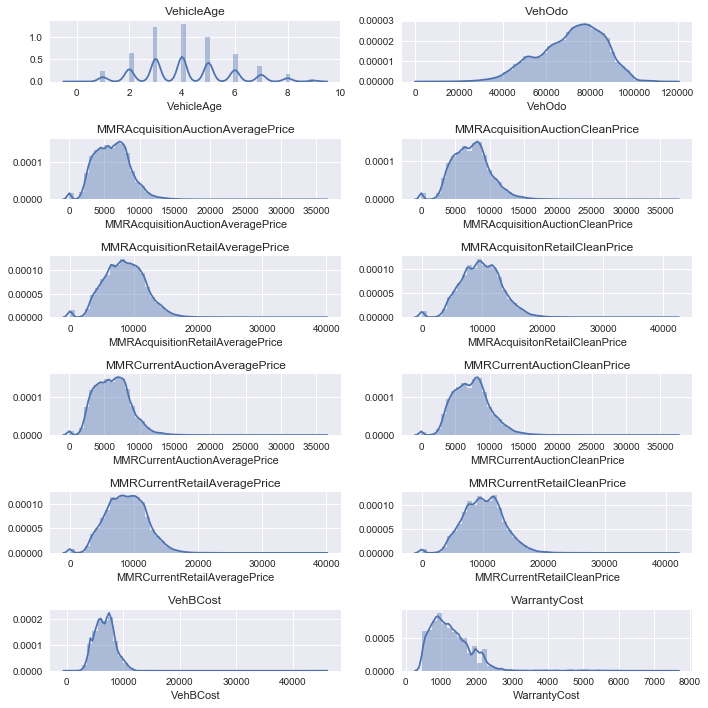

In [108]:


lst2=list(train[numerical_features])


plt.figure(figsize=(10,10))
for i in range(12):
   
    plt.subplot(6,2,i+1)
    sns.distplot(train[lst2[i]])
    plt.title(lst2[i])
plt.tight_layout()
plt.show()




In [117]:
skewed_feats = train[numerical_features].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0]
skewed_feats = skewed_feats.index

train[skewed_feats] = np.log1p(train[skewed_feats])

In [115]:
skewed_feats = train[numerical_features].apply(lambda x: skew(x.dropna()))

In [116]:
skewed_feats

VehicleAge                          -0.476019
VehOdo                              -0.454742
MMRAcquisitionAuctionAveragePrice   -6.997260
MMRAcquisitionAuctionCleanPrice     -7.429649
MMRAcquisitionRetailAveragePrice    -7.355233
MMRAcquisitonRetailCleanPrice       -7.704425
MMRCurrentAuctionAveragePrice       -7.733410
MMRCurrentAuctionCleanPrice         -8.415617
MMRCurrentRetailAveragePrice        -8.527726
MMRCurrentRetailCleanPrice          -9.091458
VehBCost                            -0.759057
WarrantyCost                        -0.051014
dtype: float64

In [81]:
train.shape

(72659, 23)

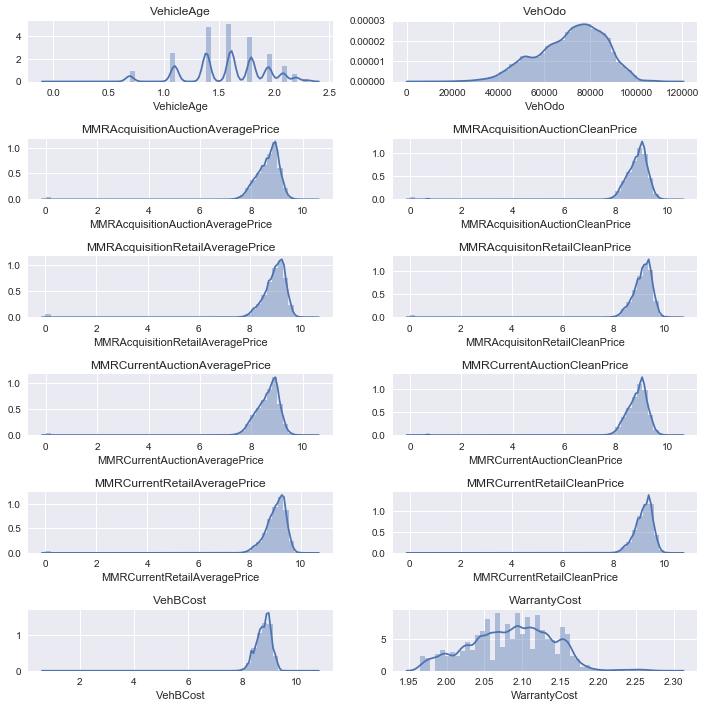

In [118]:


lst2=list(train[numerical_features])


plt.figure(figsize=(10,10))
for i in range(12):
   
    plt.subplot(6,2,i+1)
    sns.distplot(train[lst2[i]])
    plt.title(lst2[i])
plt.tight_layout()
plt.show()




# 분석1: 직접적인 데이터 검열을 통한 데이터 분석

### 다중 공산성이 높은 데이터 삭제

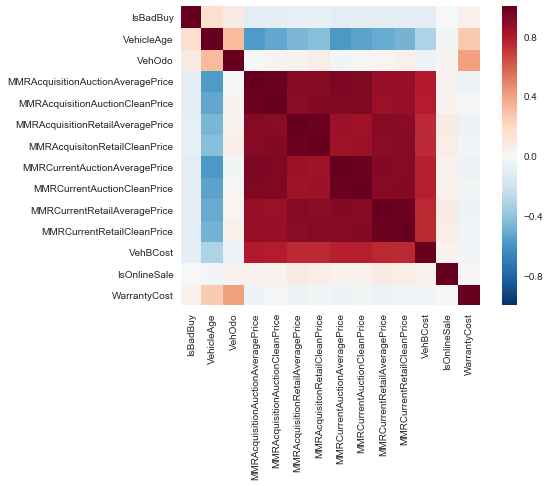

In [149]:
x_cor=train.corr()
sns.heatmap(x_cor,square=True)
plt.show()

In [150]:
num_col=['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
                        'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
                        'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice']

In [151]:
train_x1=train_x.copy()
train_y1=train_y.copy()

In [152]:
train_x1["AuctionAve"]=sum(train_x1[a] for a in num_col)/len(num_col)
train_x1=train_x1.drop(num_col,axis=1)
    

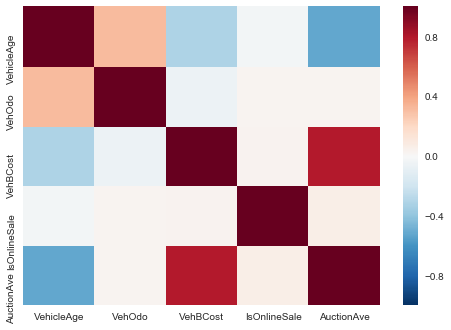

In [153]:
new_train_cor=train_x1.corr()
sns.heatmap(new_train_cor)
plt.show()

In [154]:
train_x1=train_x1.drop(["VehBCost"],axis=1)
train_x1=train_x1.drop(["AuctionAve"],axis=1)

# 라벨 데이터 인덱스 부여

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

category_col=["Auction","Make","Color","Transmission","WheelType","Nationality","Size","TopThreeAmericanName","VNST","IsOnlineSale"]

def change_category(df):
    le=LabelEncoder()
    le.fit(df)
    a=le.transform(df)
    
    return a

    

In [146]:
train_x1

,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale
0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,FL,0
1,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,FL,0
2,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,FL,0
3,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,FL,0
4,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,FL,0
5,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,FL,0
6,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,FL,0
7,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,FL,0
8,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,FL,0
9,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,FL,0


In [65]:

for col in category_col:
        train_x1[col]=change_category(train_x1[col])

In [190]:

train_x1=pd.get_dummies(train_x1)

# 랜덤 데이터  추출

In [155]:
import statsmodels.api as sm

In [156]:
train_x1=pd.concat([train_y1,train_x1],axis=1)
train_x1

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale
0,0,ADESA,3,MAZDA,RED,AUTO,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,FL,0
1,0,ADESA,5,DODGE,WHITE,AUTO,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,FL,0
2,0,ADESA,4,DODGE,MAROON,AUTO,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,FL,0
3,0,ADESA,5,DODGE,SILVER,AUTO,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,FL,0
4,0,ADESA,4,FORD,SILVER,MANUAL,Covers,69367,AMERICAN,COMPACT,FORD,FL,0
5,0,ADESA,5,MITSUBISHI,WHITE,AUTO,Covers,81054,OTHER ASIAN,MEDIUM,OTHER,FL,0
6,0,ADESA,5,KIA,BLACK,AUTO,Covers,65328,OTHER ASIAN,MEDIUM,OTHER,FL,0
7,0,ADESA,4,FORD,WHITE,AUTO,Covers,65805,AMERICAN,MEDIUM,FORD,FL,0
8,0,ADESA,2,KIA,BLACK,AUTO,Covers,49921,OTHER ASIAN,MEDIUM,OTHER,FL,0
9,0,ADESA,2,FORD,RED,AUTO,Alloy,84872,AMERICAN,LARGE,FORD,FL,0


In [193]:
good_train=train_x1.loc[train_x1["IsBadBuy"]==0]
bad_train=train_x1.loc[train_x1["IsBadBuy"]==1]
good_index=train_x1[train_x1["IsBadBuy"]==0].index
w=np.random.choice(good_index,8943,replace=False)
sample_good=train_x1.loc[w]
train_x1=pd.concat([sample_good,bad_train],ignore_index=True)


데이터를 랜덤으로 샘플을 추출한다.

In [194]:
train_x1

,IsBadBuy,VehicleAge,VehOdo,VehBCost,IsOnlineSale,AuctionAve,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,0,5,52203,5735.0,0,4882.625,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,86123,7240.0,0,8965.500,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,5,81019,4915.0,0,5014.375,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,4,87847,8800.0,0,9515.875,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,4,58385,6385.0,0,5730.750,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,2,40393,8445.0,0,8499.125,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,4,62324,6805.0,0,8034.875,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,6,81377,4200.0,0,3558.750,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,0,5,61717,9185.0,1,10479.250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,5,68721,5300.0,0,4802.500,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


http://contrib.scikit-learn.org/imbalanced-learn/auto_examples/index.html#model-selection
    
    데이터 밸런싱하게 뽑는 방법
    오버 샘플링 언더 샘플링 가능하다

# 데이터 스케일링-표준화-분석이전에 해놓자

## 카테고리 변수도 연속변수로 바꿔놓고하자

In [33]:
def scale(dataframe):

    frames_to_standardize = dataframe.columns[range(2, len(dataframe.columns))]
    mean = dataframe[frames_to_standardize].mean()
    std = dataframe[frames_to_standardize].std()
    dataframe[frames_to_standardize] = (dataframe[frames_to_standardize] - mean) / std
    
    return dataframe
    


# 데이터 분포 보기

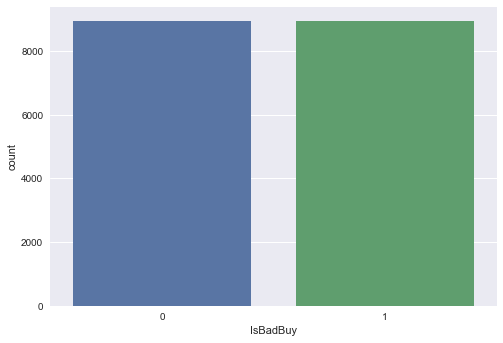

In [131]:
sns.countplot(merge_sample["IsBadBuy"])
plt.show()

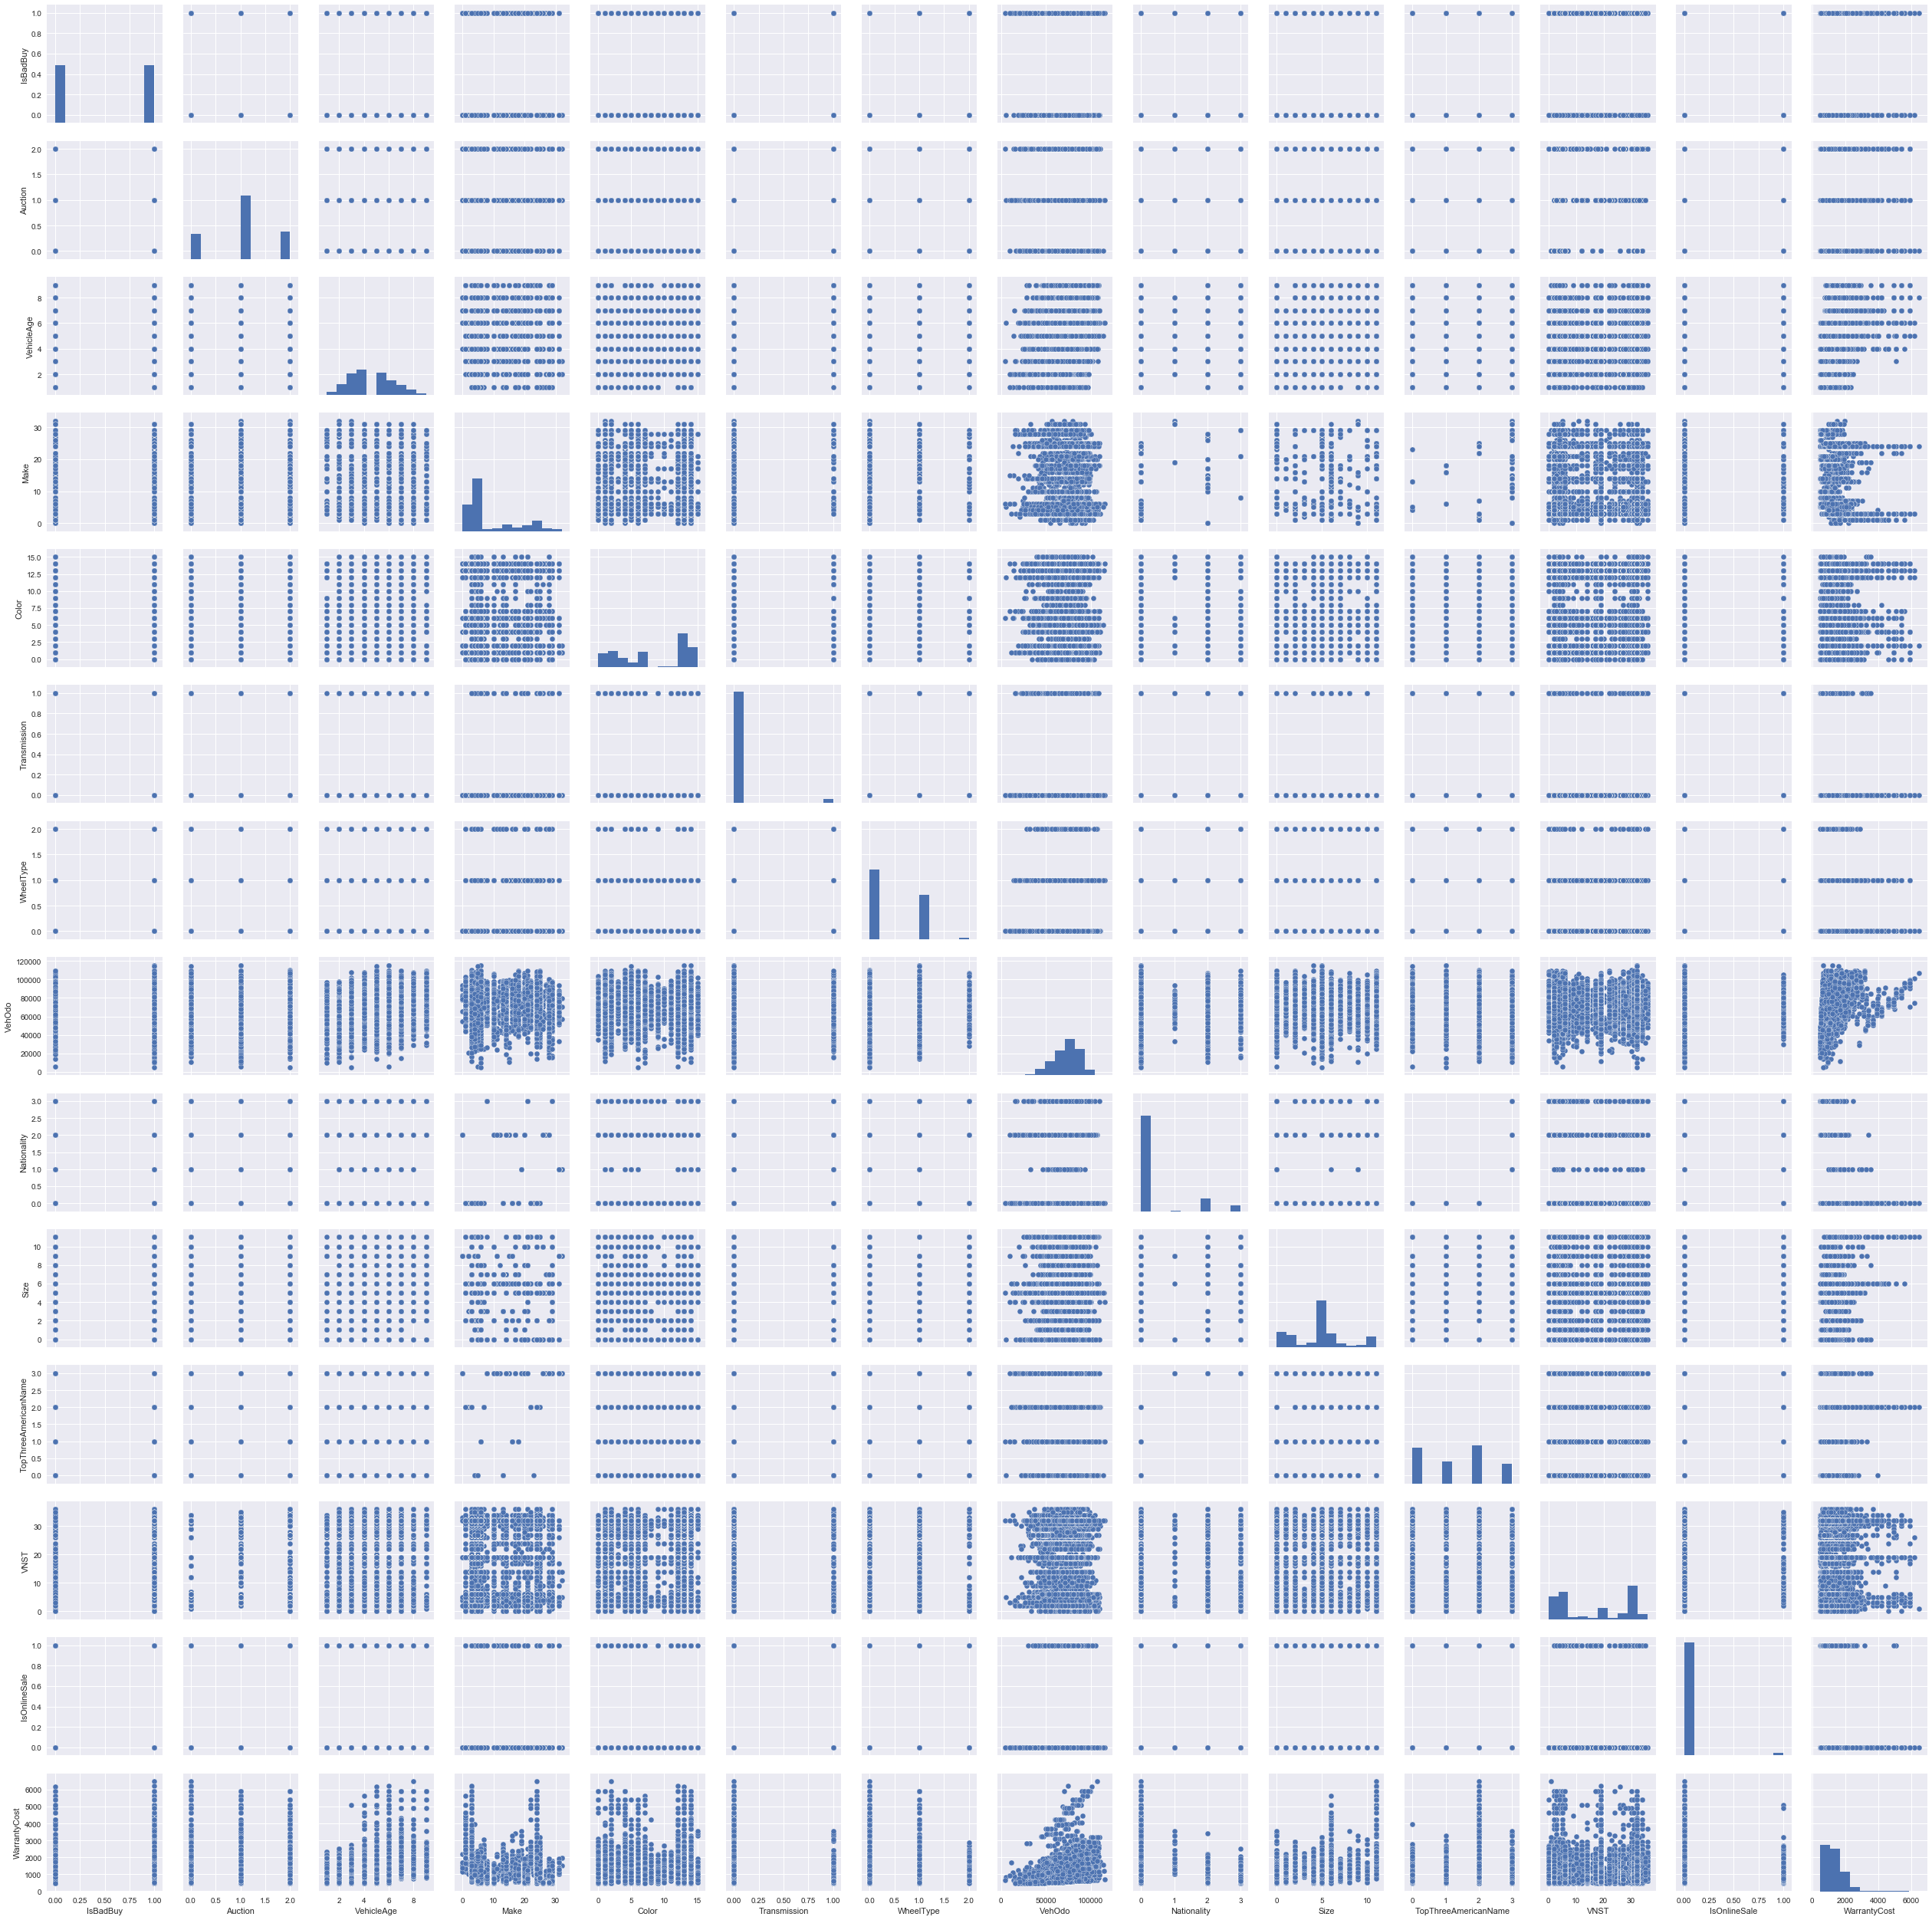

In [171]:
sns.pairplot(merge_sample)
plt.show()

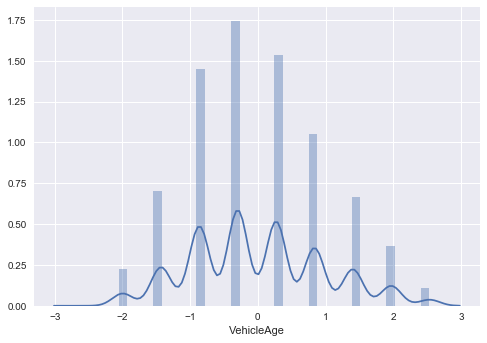

In [309]:
sns.distplot(merge_sample["VehicleAge"])
plt.show()

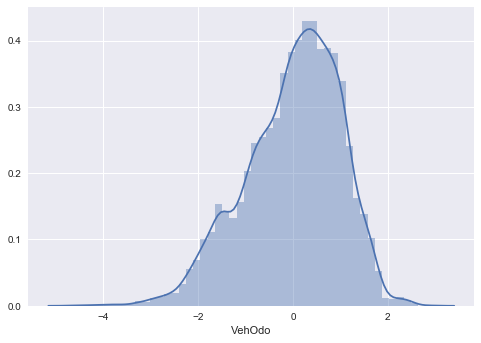

In [310]:
sns.distplot((merge_sample["VehOdo"]))
plt.show()

# 분석 1: 랜덤 샘플링을 통한 로지스틱분석 교차검증

In [157]:
from sklearn.cross_validation import train_test_split
def split_train_test(df):
    temp = df.drop("IsBadBuy", axis=1)
    train_X, test_X, train_Y, test_Y = train_test_split(temp, df.IsBadBuy,
                                                        test_size=0.3, random_state=4531)
    train_X = pd.DataFrame(train_X, columns=df.columns[1:])
    test_X = pd.DataFrame(test_X, columns=df.columns[1:])
    train_Y = pd.DataFrame(train_Y, columns=['IsBadBuy'])
    test_Y = pd.DataFrame(test_Y, columns=['IsBadBuy'])
   
    scale(train_X)
    scale(test_X)

    return train_X, test_X, train_Y, test_Y

In [158]:
train_x1.

array(['Auction', 'Make', 'Color', 'Transmission', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'VNST', 'IsBadBuy',
       'IsOnlineSale'], dtype=object)

In [39]:
a=list(train_x1["Auction"].unique())
k=train_x1["Auction"].map(lambda x :a.index(x))

In [159]:
def convert_nominal_cols(df):
    '''
    This function converts nominal cols to integers
    Takes the unique values into an array and fills in an array index
    '''

    for col in categorical_features:
        listOfItems = list(df[col].unique())
        df[col] = df[col].map(lambda x : listOfItems.index(x))

    return df

In [160]:
train_x1_1=convert_nominal_cols(train_x1)

In [161]:
train_x1_1

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,VNST,IsOnlineSale
0,0,0,3,0,0,0,0,89046,0,0,0,0,0
1,0,0,5,1,1,0,0,93593,1,1,1,0,0
2,0,0,4,1,2,0,1,73807,1,0,1,0,0
3,0,0,5,1,3,0,0,65617,1,2,1,0,0
4,0,0,4,2,3,1,1,69367,1,2,2,0,0
5,0,0,5,3,1,0,1,81054,0,0,0,0,0
6,0,0,5,4,4,0,1,65328,0,0,0,0,0
7,0,0,4,2,1,0,1,65805,1,0,2,0,0
8,0,0,2,4,4,0,1,49921,0,0,0,0,0
9,0,0,2,2,0,0,0,84872,1,3,2,0,0


In [162]:
train1_x1, test1_x1, train1_y1, test1_y1=split_train_test(train_x1_1)


In [48]:
train1_x1.shape

(50861, 12)

In [50]:
train1_y1.shape

(50861, 1)

## 모델에 넣기전에 데이터들 한 번 모델에 맞게 고쳐줘야한다.

In [51]:
train1_y1=np.array(train1_y1)
train1_y1=train1_y1.reshape(12520,)
train1_y1.shape
test1_y1=np.array(test1_y1)
test1_y1=test1_y1.reshape(5366,)
test1_y1.shape

ValueError: total size of new array must be unchanged

In [201]:
train_x1 = train_x1.fillna(lambda x: x.mode())

In [202]:
train_x1.isnull().any()

VehicleAge         False
VehOdo             False
VehBCost           False
IsOnlineSale       False
AuctionAve         False
Auction_ADESA      False
Auction_MANHEIM    False
Auction_OTHER      False
Make_ACURA         False
Make_BUICK         False
Make_CADILLAC      False
Make_CHEVROLET     False
Make_CHRYSLER      False
Make_DODGE         False
Make_FORD          False
Make_GMC           False
Make_HONDA         False
Make_HUMMER        False
Make_HYUNDAI       False
Make_INFINITI      False
Make_ISUZU         False
Make_JEEP          False
Make_KIA           False
Make_LEXUS         False
Make_LINCOLN       False
Make_MAZDA         False
Make_MERCURY       False
Make_MINI          False
Make_MITSUBISHI    False
Make_NISSAN        False
                   ...  
VNST_IA            False
VNST_ID            False
VNST_IL            False
VNST_IN            False
VNST_KY            False
VNST_LA            False
VNST_MA            False
VNST_MD            False
VNST_MI            False


In [203]:
test_x1 = test_x1.fillna(lambda x: x.mode())

In [204]:
train_x1

,VehicleAge,VehOdo,VehBCost,IsOnlineSale,AuctionAve,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
3410,6,53788,5725.0,0,5489.250,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5019,4,78305,3650.0,0,4333.875,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12079,5,86448,5200.0,0,5825.250,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3318,4,80319,6400.0,0,9292.750,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
17799,5,109260,3905.0,0,5690.125,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
10679,9,81739,4800.0,0,5255.375,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
16389,7,71593,3695.0,0,3087.125,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16676,8,78264,5540.0,0,5938.750,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8406,3,74029,9055.0,0,11643.125,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10215,2,55039,8300.0,0,11041.625,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [205]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression

train_x1=sm.add_constant(train_x1)
logreg=LogisticRegression()

predicted = cross_validation.cross_val_predict(logreg, train_x1, train_y1, cv=10)
scores = cross_validation.cross_val_score(logreg, train_x1, train_y1, cv=10)
print metrics.classification_report(train_y1, predicted) 
print(metrics.accuracy_score(train_y1, predicted))


print('average score: {}'.format(scores.mean()))


             precision    recall  f1-score   support

          0       0.63      0.63      0.63      6283
          1       0.63      0.63      0.63      6237

avg / total       0.63      0.63      0.63     12520

0.630271565495
average score: 0.630273527927


In [207]:
logreg.fit(train_x1,train_y1)
test_x1=sm.add_constant(test_x1)
pred=logreg.predict(test_x1)
print(metrics.accuracy_score(test_y1, pred)) 

0.623928438315


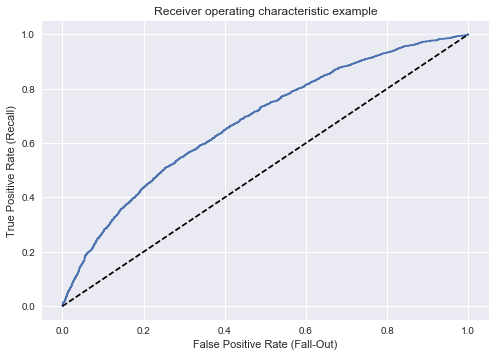

In [209]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_y1,logreg.decision_function(test_x1))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


# 분석 2: PCA를 통해 성분을 선택후  분석


train_x2=train_x.copy()
train_y2=train_y.copy()

In [458]:

for col in category_col:
        train_x2[col]=change_category(train_x2[col])

###### 라벨링 이후 스케일 이후 pca진행

In [459]:
train_x2=pd.concat([train_y2,train_x2],axis=1)

In [460]:
train_x2, test_x2, train_y2, test_y2=split_train_test(train_x2)

In [461]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x2=pca.fit_transform(train_x2)
x2

array([[-6.53093317,  2.0596628 , -0.43762625, ...,  1.18859704,
         0.21558779, -1.39608578],
       [ 2.37479684, -2.64396664, -0.25881845, ..., -0.64667146,
         1.41098312, -0.69121929],
       [-1.66167258,  0.05479511,  2.86081752, ...,  0.83242774,
        -1.29168326,  0.30966502],
       ..., 
       [-2.98595123, -1.06520154,  0.24035357, ...,  0.06956531,
        -0.01585185,  1.19464014],
       [ 3.32412926, -0.81852228, -1.13936563, ...,  2.0693161 ,
         0.12123069,  0.74805904],
       [ 2.54254562,  0.47340204,  1.06448497, ..., -1.21586761,
         0.65970578, -0.96798343]])

In [462]:
np.sum(pca.explained_variance_ratio_)

0.90693094289536458

In [463]:
test_x2=pca.fit_transform(test_x2)


In [464]:
train_x2

,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale
27289,2,8,1.925712,0.983982,-0.193026,-0.908709,1.012703,-0.432670,2.194437,0.584256,...,-1.783069,-1.897754,-1.963372,-1.616976,-1.676620,-1.913129,-1.974851,-1.164852,-1.853800,-0.164306
29372,2,1,-0.494659,-1.547445,-0.193026,-0.908709,-1.358717,-0.432670,0.066698,-1.245368,...,0.008411,0.849278,0.527389,0.470556,0.192032,0.668784,0.385214,0.833274,-0.184457,-0.164306
15936,1,4,-0.112495,0.983982,-0.193026,1.016553,0.805536,2.996661,-1.706418,1.499067,...,-0.644875,-0.847819,-0.973932,-0.460021,-0.636370,-0.151041,-0.352685,1.232899,-0.877178,-0.164306
10347,1,4,-0.494659,-1.157995,-0.193026,-0.908709,-0.173728,-0.432670,2.194437,-1.245368,...,-0.275770,-0.779897,-0.653192,-0.408664,-0.285277,-0.884381,-0.754295,1.232899,-0.650056,-0.164306
3684,0,5,-0.494659,1.178707,-0.193026,-0.908709,0.930565,-0.432670,2.194437,-1.245368,...,0.356928,0.489673,0.675924,0.095449,0.260538,0.290129,0.470495,0.753349,0.000079,-0.164306
60691,1,3,-0.367271,0.789257,5.180541,1.016553,1.580178,-0.432670,-1.706418,-0.330556,...,-0.417677,-0.124482,-0.124150,-0.187216,-0.072685,0.208503,0.128159,-1.084927,-1.237733,-0.164306
58525,2,8,0.906609,0.789257,-0.193026,-0.908709,-0.834957,-0.432670,-0.997172,-0.330556,...,-0.932364,-0.584701,-0.486017,-0.797329,-0.829602,-0.396567,-0.448248,-0.925077,-0.349120,-0.164306
47287,1,3,2.435264,-1.352720,-0.193026,1.016553,0.242186,1.853551,0.066698,1.499067,...,-0.550025,-0.003873,-0.174450,-0.361417,-0.464733,-0.044473,-0.143412,1.232899,-0.794846,-0.164306
7182,1,3,1.925712,-1.157995,-0.193026,-0.908709,-1.170108,-0.432670,-0.997172,0.584256,...,0.394059,-0.175582,-0.070890,0.315665,0.393082,-0.267650,-0.159138,-0.845152,0.587756,-0.164306
32558,1,4,1.161384,-1.157995,-0.193026,-0.908709,1.229287,-0.432670,0.775944,-0.330556,...,0.887791,0.162758,0.358143,0.888802,0.935173,0.220488,0.316565,-1.005002,-0.195813,-0.164306


In [465]:
train_y2.shape

(50861, 1)

In [466]:
train_y2=np.array(train_y2)
train_y2=train_y2.reshape(len(train_y2),)
train_y2.shape
test_y2=np.array(test_y2)
test_y2=test_y2.reshape(len(test_y2),)
test_y2.shape

(21798,)

In [467]:
clf=LogisticRegression()
logreg=clf.fit(x2,train_y2)
y_predict_logreg=logreg.predict(test_x2)


In [468]:
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression


x2=sm.add_constant(x2)
logreg=LogisticRegression()
x3=sm.add_constant(test_x2)
predicted = cross_validation.cross_val_predict(logreg, x2, train_y2, cv=10)
scores = cross_validation.cross_val_score(logreg, x2, train_y2, cv=10)
print metrics.classification_report(train_y2, predicted) 
print(metrics.accuracy_score(train_y2, predicted))


print('average score: {}'.format(scores.mean()))


             precision    recall  f1-score   support

          0       0.88      1.00      0.93     44561
          1       0.00      0.00      0.00      6300

avg / total       0.77      0.88      0.82     50861

0.876132989914
average score: 0.876132989483


In [469]:
from sklearn.metrics import classification_report
print (classification_report(test_y2,y_predict_logreg))

             precision    recall  f1-score   support

          0       0.88      1.00      0.94     19155
          1       0.00      0.00      0.00      2643

avg / total       0.77      0.88      0.82     21798



In [473]:
logreg.fit(x2,train_y2)
pred=logreg.predict(x3)
print(metrics.accuracy_score(test_y2,pred)) 

0.878750344068


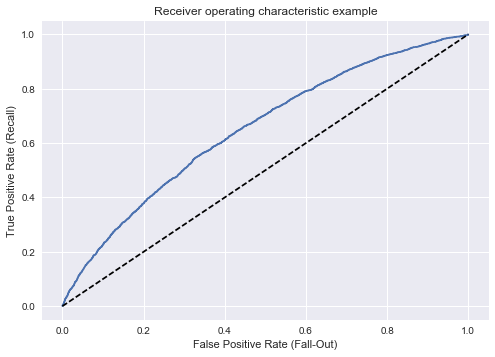

In [474]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_y2,logreg.decision_function(x3))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


# 분석3: 다운샘플링 후 pca 그리고 로지스틱

In [520]:
train_x3=train_x.copy()
train_y3=train_y.copy()

In [521]:
for col in category_col:
        train_x3[col]=change_category(train_x3[col])

In [522]:
train_x3=pd.concat([train_y3,train_x3],axis=1)

In [523]:
good_train=train_x3.loc[train_x3["IsBadBuy"]==0]
bad_train=train_x3.loc[train_x3["IsBadBuy"]==1]
good_index=train_x3[train_x3["IsBadBuy"]==0].index
w=np.random.choice(good_index,8943,replace=False)
sample_good=train_x3.loc[w]
train_x3=pd.concat([sample_good,bad_train],ignore_index=True)


In [524]:
train_x3, test_x3, train_y3, test_y3=split_train_test(train_x3)

In [525]:
train_y3=np.array(train_y3)
train_y3=train_y3.reshape(len(train_y3),)
train_y3.shape
test_y3=np.array(test_y3)
test_y3=test_y3.reshape(len(test_y3),)
test_y3.shape

(5366,)

In [ ]:
pca1=PCA(n_components=10)
train_pca3=pca1.fit_transform(train_x3)


In [528]:
test_x3=pca1.fit_transform(test_x3)


In [529]:


x_pca=sm.add_constant(train_pca3)
logreg=LogisticRegression()
x_pca_test=sm.add_constant(test_x3)
predicted = cross_validation.cross_val_predict(logreg, x_pca, train_y3, cv=10)
scores = cross_validation.cross_val_score(logreg, x_pca, train_y3, cv=10)
print metrics.classification_report(train_y3, predicted) 
print(metrics.accuracy_score(train_y3, predicted))


print('average score: {}'.format(scores.mean()))


             precision    recall  f1-score   support

          0       0.63      0.62      0.62      6283
          1       0.62      0.63      0.63      6237

avg / total       0.63      0.63      0.63     12520

0.625958466454
average score: 0.625960172684


In [531]:
logreg.fit(x_pca,train_y3)
pred=logreg.predict(x_pca_test)
print(metrics.accuracy_score(test_y3,pred)) 

0.609206112561


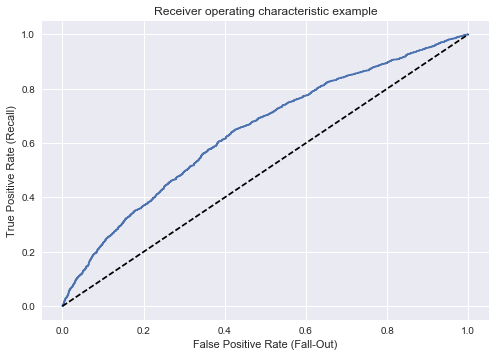

In [532]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_y3,logreg.decision_function(x_pca_test))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()


# PCA 이후 SVM linear로 분석

In [534]:
from sklearn.svm import SVC
svc=SVC(kernel="linear").fit(train_pca3,train_y3)



In [535]:
y_predict_svc=svc.predict(test_x3)
from sklearn.metrics import classification_report
print (classification_report(test_y3,y_predict_svc))

             precision    recall  f1-score   support

          0       0.60      0.60      0.60      2660
          1       0.61      0.61      0.61      2706

avg / total       0.61      0.61      0.61      5366



# SVM 하이퍼 파라미터 튜닝

# 다운샘플링을 통한 분석

In [163]:
from imblearn.under_sampling import RandomUnderSampler


In [164]:
train_x5=train_x.copy()
train_y5=train_y.copy()
for col in category_col:
        train_x5[col]=change_category(train_x5[col])
        

NameError: name 'category_col' is not defined

In [604]:
under=RandomUnderSampler(return_indices=False)
train_x5,train_y5=under.fit_sample(train_x5,train_y5)

In [609]:
x5=pd.DataFrame(train_x5,columns=train_x.columns)
y5=pd.DataFrame(train_y5,columns=["IsBadBuy"])

In [610]:
train_x5=pd.concat([y5,x5],axis=1)

train_x5, test_x5, train_y5, test_y5=split_train_test(train_x5)


In [611]:
train_y5=np.array(train_y5)
train_y5=train_y5.reshape(len(train_y5),)
train_y5.shape
test_y5=np.array(test_y5)
test_y5=test_y5.reshape(len(test_y5),)
test_y5.shape

(5366,)

In [615]:
pca5=PCA(n_components=10)
train_x5=pca5.fit_transform(train_x5)
test_x5=pca5.fit_transform(test_x5)

In [618]:
x_pca5=sm.add_constant(train_x5)
logreg=LogisticRegression()
x_pca_test5=sm.add_constant(test_x5)
predicted = cross_validation.cross_val_predict(logreg, x_pca5, train_y5, cv=10)
scores = cross_validation.cross_val_score(logreg, x_pca5, train_y5, cv=10)
print metrics.classification_report(train_y5, predicted) 
print(metrics.accuracy_score(train_y5, predicted))


print('average score: {}'.format(scores.mean()))

             precision    recall  f1-score   support

          0       0.62      0.61      0.62      6237
          1       0.62      0.63      0.63      6283

avg / total       0.62      0.62      0.62     12520

0.62196485623
average score: 0.621967390836


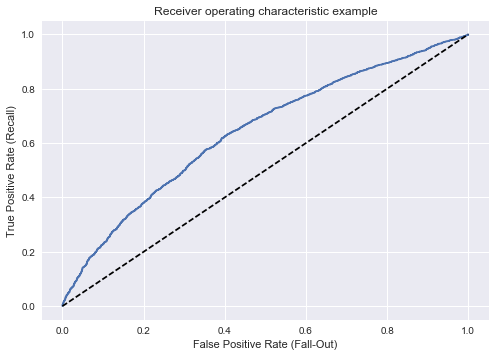

In [619]:
logreg.fit(x_pca5,train_y5)


fpr,tpr,thresholds=roc_curve(test_y5,logreg.decision_function(x_pca_test5))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [620]:
from sklearn.svm import SVC
svc=SVC(kernel="linear").fit(train_x5,train_y5)
y_predict_svc=svc.predict(test_x5)
from sklearn.metrics import classification_report
print (classification_report(test_y5,y_predict_svc))


             precision    recall  f1-score   support

          0       0.61      0.60      0.60      2706
          1       0.60      0.62      0.61      2660

avg / total       0.61      0.61      0.61      5366



In [621]:
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [623]:
train_x6=train_x.copy()
train_y6=train_y.copy()
for col in category_col:
        train_x6[col]=change_category(train_x6[col])
nunder=NeighbourhoodCleaningRule(return_indices=False)
train_x6,train_y6=nunder.fit_sample(train_x6,train_y6)

In [628]:
x6=pd.DataFrame(train_x6,columns=train_x.columns)
y6=pd.DataFrame(train_y6,columns=["IsBadBuy"])
train_x6=pd.concat([y6,x6],axis=1)

train_x6, test_x6, train_y6, test_y6=split_train_test(train_x6)



In [629]:
train_y6=np.array(train_y6)
train_y6=train_y6.reshape(len(train_y6),)
train_y6.shape
test_y6=np.array(test_y6)
test_y6=test_y6.reshape(len(test_y6),)


In [631]:
pca6=PCA(n_components=10)
train_x6=pca6.fit_transform(train_x6)
test_x6=pca6.fit_transform(test_x6)



x_pca=sm.add_constant(train_x6)
logreg=LogisticRegression()
x_pca_test=sm.add_constant(test_x6)
predicted = cross_validation.cross_val_predict(logreg, x_pca, train_y6, cv=10)
scores = cross_validation.cross_val_score(logreg, x_pca, train_y6, cv=10)
print metrics.classification_report(train_y6, predicted) 
print(metrics.accuracy_score(train_y6, predicted))


print('average score: {}'.format(scores.mean()))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92     34451
          1       0.55      0.01      0.02      6305

avg / total       0.80      0.85      0.78     40756

0.845666895672
average score: 0.845666879549


In [669]:
from imblearn.ensemble import EasyEnsemble

train_x7=train_x.copy()
train_y7=train_y.copy()
for col in category_col:
        train_x7[col]=change_category(train_x7[col])
ee=EasyEnsemble(n_subsets=1)
train_x7,train_y7=ee.fit_sample(train_x7,train_y7)

In [670]:

x7=pd.DataFrame(train_x7[0],columns=train_x.columns)
y7=pd.DataFrame(train_y7[0],columns=["IsBadBuy"])
ㄴ train_x7=pd.concat([y7,x7],axis=1)

train_x7, test_x7, train_y7, test_y7=split_train_test(train_x7)

In [671]:
train_y7=np.array(train_y7)
train_y7=train_y7.reshape(len(train_y7),)

test_y7=np.array(test_y7)
test_y7=test_y7.reshape(len(test_y7),)


In [672]:
from sklearn.svm import SVC
svc=SVC(kernel="linear").fit(train_x7,train_y7)
y_predict_svc=svc.predict(test_x7)
from sklearn.metrics import classification_report
print (classification_report(test_y7,y_predict_svc))


             precision    recall  f1-score   support

          0       0.63      0.62      0.62      2706
          1       0.62      0.63      0.63      2660

avg / total       0.63      0.63      0.63      5366



In [673]:
rbfsvc = SVC(kernel="rbf").fit(train_x7, train_y7)
y_predict_rbfsvc=rbfsvc.predict(test_x7)

print (classification_report(test_y7,y_predict_rbfsvc))

             precision    recall  f1-score   support

          0       0.66      0.60      0.63      2706
          1       0.63      0.69      0.65      2660

avg / total       0.64      0.64      0.64      5366



In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe_svc = Pipeline([('scl', StandardScaler()), ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [
    {'clf__C': param_range, 'clf__kernel': ['linear']},
    {'clf__C': param_range, 'clf__gamma': param_range, 'clf__kernel': ['rbf']}]
 
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)
score=gs.fit(train_x7,train_y7)

In [668]:
pca7=PCA(n_components=10)
train_x7=pca7.fit_transform(train_x7)
test_x7=pca7.fit_transform(test_x7)



x_pca=sm.add_constant(train_x7)
logreg=LogisticRegression()
x_pca_test=sm.add_constant(test_x7)
predicted = cross_validation.cross_val_predict(logreg, x_pca, train_y7, cv=10)
scores = cross_validation.cross_val_score(logreg, x_pca, train_y7, cv=10)
print metrics.classification_report(train_y7, predicted) 
print(metrics.accuracy_score(train_y7, predicted))


print('average score: {}'.format(scores.mean()))

             precision    recall  f1-score   support

          0       0.62      0.61      0.61      6237
          1       0.62      0.63      0.62      6283

avg / total       0.62      0.62      0.62     12520

0.615734824281
average score: 0.615736718892
